# Gold Recovery Prediction Project

## Table of Contents
1. [Prepare the Data](#prepare-the-data)
2. [Analyze the Data](#analyze-the-data)
3. [Build the Model](#build-the-model)
4. [Conclusion](#conclusion)

---

## Prepare the Data <a name="prepare-the-data"></a>




In [2]:
# Import necessary libraries and read the data files

## 1.1. Open the files and look into the data
This code snippet imports the necessary libraries, reads the data files, and displays the first 5 rows of each dataset. It also shows summary statistics for each dataset to help us get a sense of the data distributions and values. 

In [3]:
import os
import pandas as pd

# Check if the datasets folder exists
if not os.path.exists('datasets'):
    os.makedirs('datasets')

# Download the source CSV files and save them in the datasets folder
urls = {
    'train': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv',
    'test': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv',
    'full': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv'
}

for name, url in urls.items():
    data = pd.read_csv(url, parse_dates=['date'], index_col='date')
    data.to_csv(f'datasets/gold_recovery_{name}.csv')

# Read the data files
train_data = pd.read_csv('datasets/gold_recovery_train.csv', parse_dates=['date'], index_col='date')
test_data = pd.read_csv('datasets/gold_recovery_test.csv', parse_dates=['date'], index_col='date')
full_data = pd.read_csv('datasets/gold_recovery_full.csv', parse_dates=['date'], index_col='date')

# # Display the first 5 rows of each dataset
# print("Training data:")
# display(train_data.head())
# print("Test data:")
# display(test_data.head())
# print("Full data:")
# display(full_data.head())

# # Display summary statistics for each dataset
# print("Training data summary statistics:")
# display(train_data.describe())
# print("Test data summary statistics:")
# display(test_data.describe())
# print("Full data summary statistics:")
# display(full_data.describe())


In [4]:
# Display the first 5 rows of each dataset
print("Training data:")
display(train_data.head())
print("Test data:")
display(test_data.head())
print("Full data:")
display(full_data.head())



Training data:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Test data:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Full data:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
# Display summary statistics for each dataset
print("Training data summary statistics:")
display(train_data.describe())
print("Test data summary statistics:")
display(test_data.describe())
print("Full data summary statistics:")
display(full_data.describe())

Training data summary statistics:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


Test data summary statistics:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


Full data summary statistics:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


## 1.2. Check recovery calculation correctness
The first and second snippet checks for missing values, and the third snippet calculates the recovery using the provided formula and compares it with the given recovery values, printing the mean absolute error (MAE) between them.

In [6]:
# Check for missing values
print("Training data missing values:")
display(train_data.isna().sum())
print("Test data missing values:")
display(test_data.isna().sum())
print("Full data missing values:")
display(full_data.isna().sum())

Training data missing values:


final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 86, dtype: int64

Test data missing values:


primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257
rougher.input.floatbank10_xanthate            123


Full data missing values:


final.output.concentrate_ag                     89
final.output.concentrate_pb                     87
final.output.concentrate_sol                   385
final.output.concentrate_au                     86
final.output.recovery                         1963
                                              ... 
secondary_cleaner.state.floatbank5_a_level     101
secondary_cleaner.state.floatbank5_b_air       101
secondary_cleaner.state.floatbank5_b_level     100
secondary_cleaner.state.floatbank6_a_air       119
secondary_cleaner.state.floatbank6_a_level     101
Length: 86, dtype: int64

In [7]:
# Check for missing values in the columns involved in the recovery calculation
missing_values = train_data[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']].isna().sum()
print("Missing values in involved columns in train_data:\n", missing_values)

Missing values in involved columns in train_data:
 rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
rougher.output.recovery          2573
dtype: int64


## 1.2.1
This code will generate three heatmaps for the train_data, test_data, and full_data datasets. In the heatmaps, the x-axis represents columns, and the y-axis represents rows. A colored cell indicates a missing value in that position.

By visualizing the missing data in this way, we can get a better sense of the distribution and pattern of missing values in our dataset. This can help you identify potential issues in data collection or processing and inform your strategy for handling missing values.

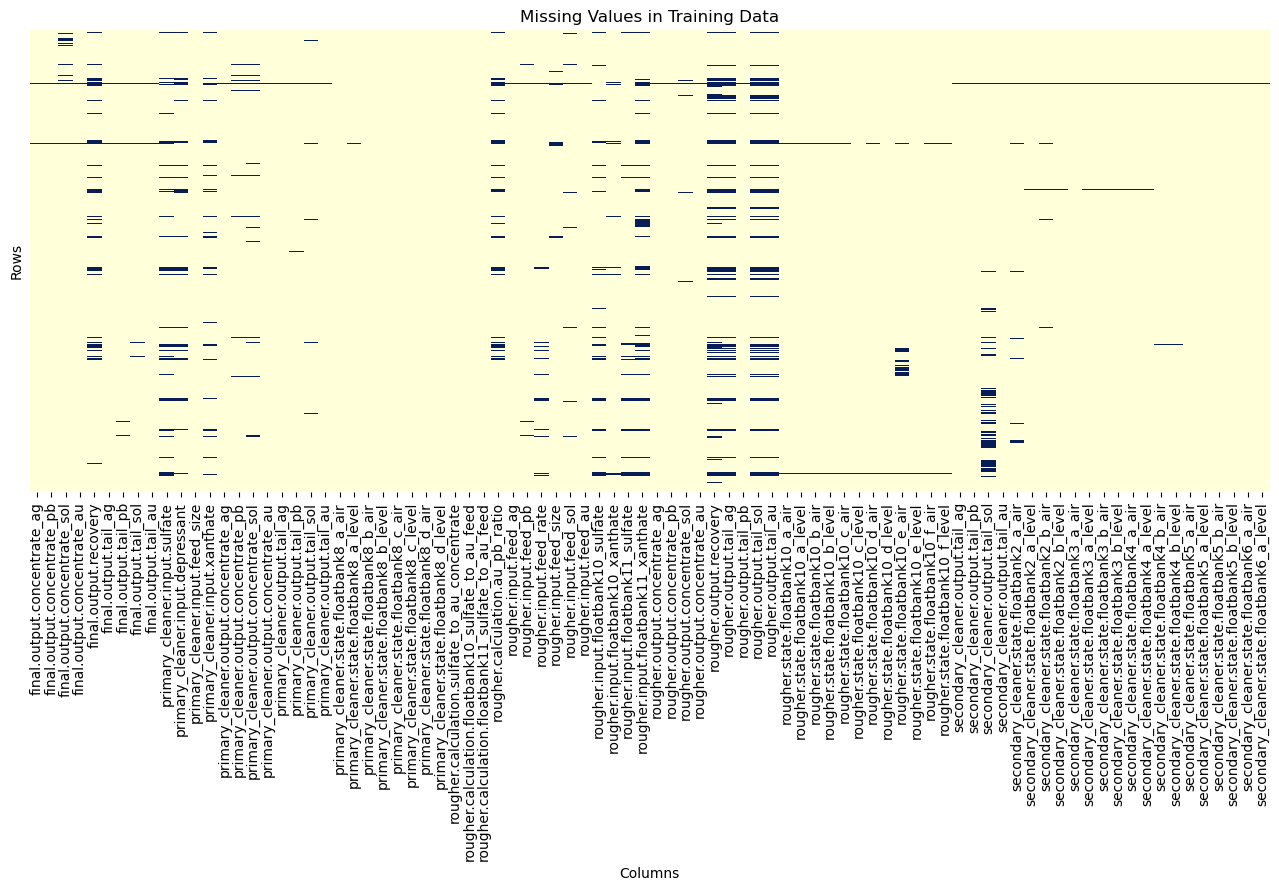

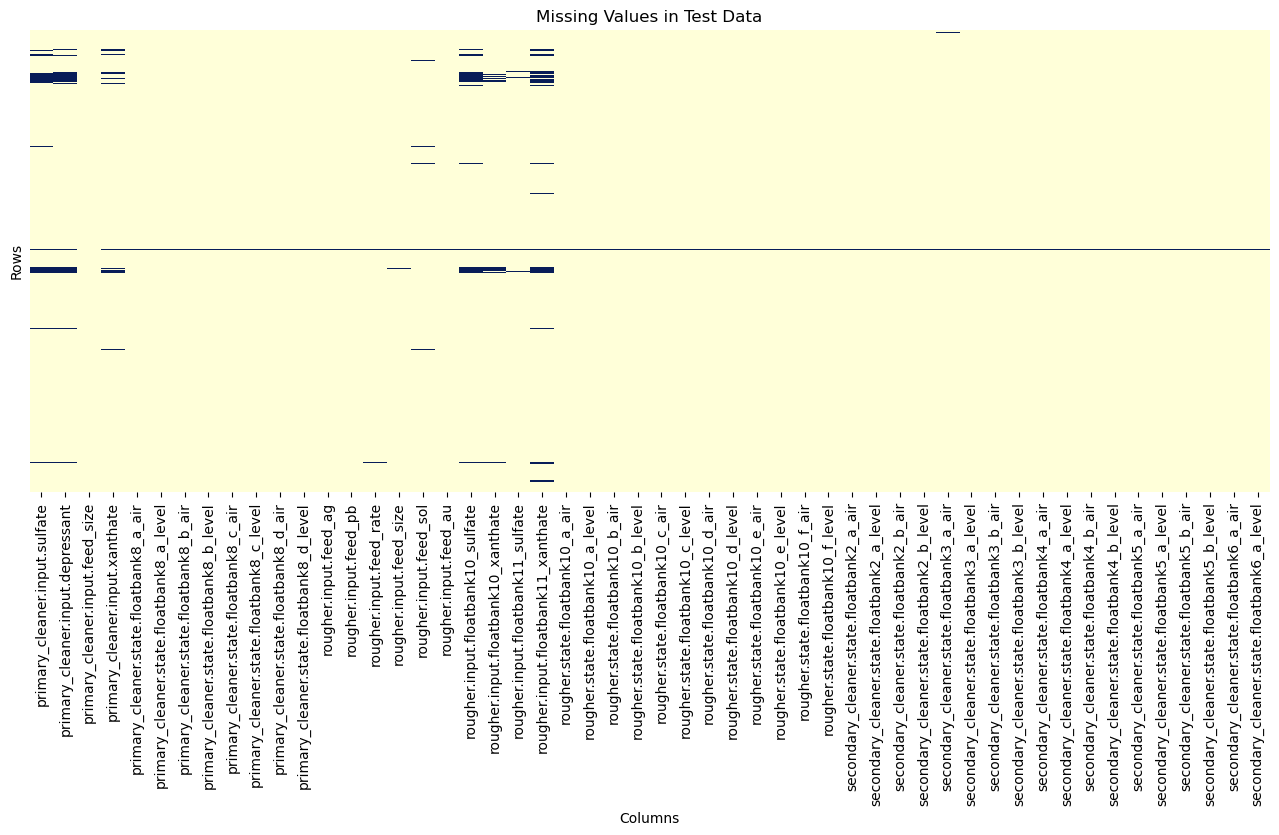

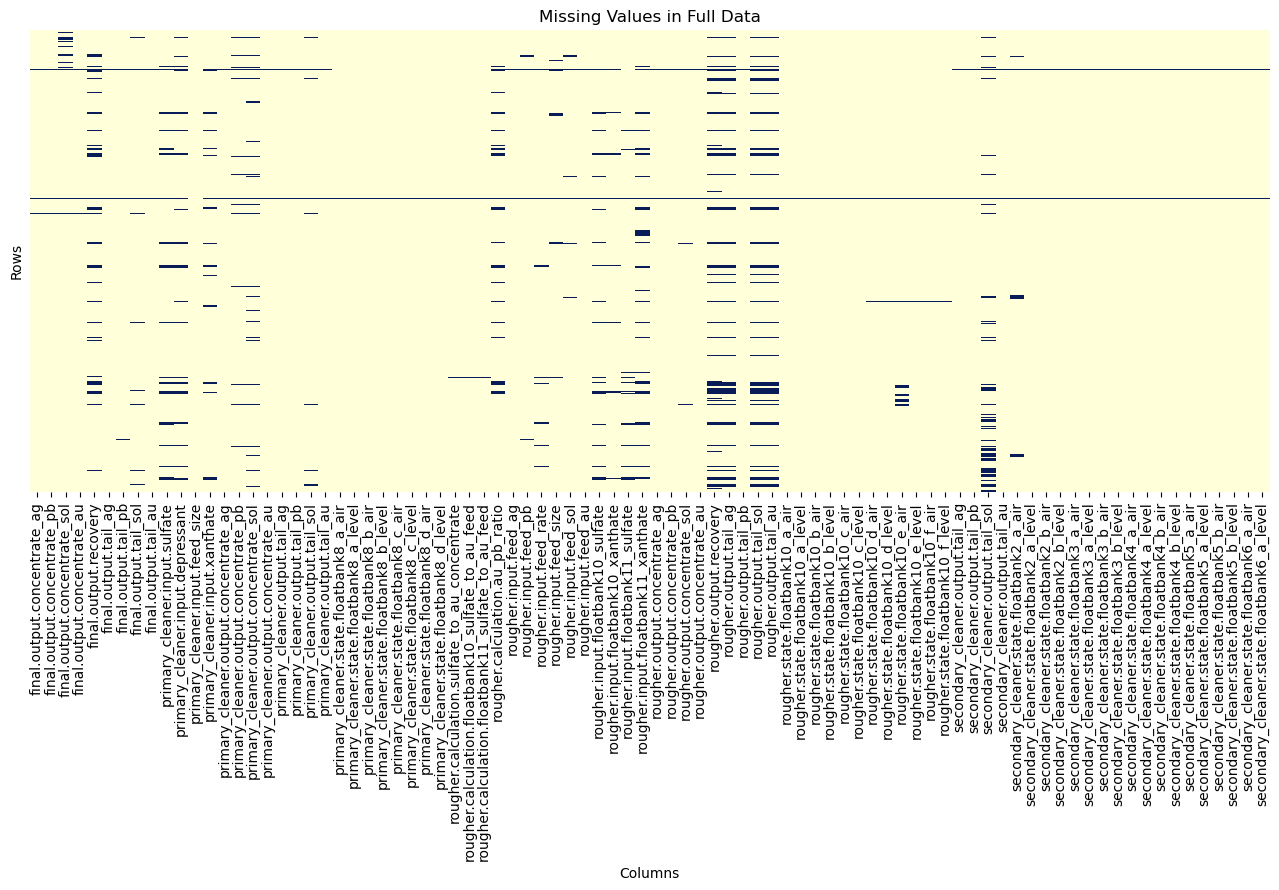

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_values_heatmap(data, title):
    plt.figure(figsize=(16, 6))
    sns.heatmap(data.isna(), cmap="YlGnBu", cbar=False, yticklabels=False)
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

plot_missing_values_heatmap(train_data, 'Missing Values in Training Data')
plot_missing_values_heatmap(test_data, 'Missing Values in Test Data')
plot_missing_values_heatmap(full_data, 'Missing Values in Full Data')


Visually, it looks like there is strong corrilationa and banding around the missing data. I wonder what's causing that...?
Some collumbs have nearly zero data loss, while others have regular drops in data logging. I bet there is something in the process that is causing the data loss. <br>
<br>
My first inclination was to fill the missing data... but now I'm not so sure...

This code first defines a function count_rows_with_missing_data() that takes a DataFrame and returns the number of rows containing at least one missing value. It then computes the counts for each dataset and stores them in a dictionary. The counts are printed out for our reference.

Finally, the code creates a bar plot using Seaborn to visualize the number of rows with missing data in each dataset. The x-axis shows the dataset names, and the y-axis shows the number of rows with missing data.

In [9]:
import numpy as np

def count_rows_with_missing_data(data):
    return np.sum(data.isna().any(axis=1))

missing_data_counts = {
    'Training Data': count_rows_with_missing_data(train_data),
    'Test Data': count_rows_with_missing_data(test_data),
    'Full Data': count_rows_with_missing_data(full_data)
}

print("Number of rows with missing data:")
for key, value in missing_data_counts.items():
    print(f"{key}: {value}")

### Uncomment to graph the results

# # Plot the results
# plt.figure(figsize=(8, 5))
# sns.barplot(x=list(missing_data_counts.keys()), y=list(missing_data_counts.values()), palette="YlGnBu")
# plt.ylabel('Number of Rows with Missing Data')
# plt.title('Rows with Missing Data in Each Dataset')
# plt.show()


Number of rows with missing data:
Training Data: 5843
Test Data: 473
Full Data: 6622


Percentage of rows with missing data:
Training Data: 34.66%
Test Data: 8.08%
Full Data: 29.15%


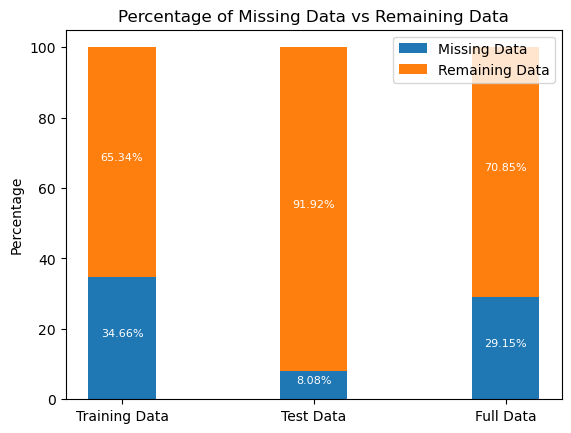

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of rows with missing data
train_missing_rows = train_data.isna().any(axis=1).sum()
test_missing_rows = test_data.isna().any(axis=1).sum()
full_missing_rows = full_data.isna().any(axis=1).sum()

# Calculate the percentage of rows with missing data
train_missing_percent = (train_missing_rows / len(train_data)) * 100
test_missing_percent = (test_missing_rows / len(test_data)) * 100
full_missing_percent = (full_missing_rows / len(full_data)) * 100

print("Percentage of rows with missing data:")
print(f"Training Data: {train_missing_percent:.2f}%")
print(f"Test Data: {test_missing_percent:.2f}%")
print(f"Full Data: {full_missing_percent:.2f}%")

# Plot the stacked bar chart
labels = ['Training Data', 'Test Data', 'Full Data']
missing_data_percent = [train_missing_percent, test_missing_percent, full_missing_percent]
remaining_data_percent = [100 - train_missing_percent, 100 - test_missing_percent, 100 - full_missing_percent]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x, missing_data_percent, width, label='Missing Data')
bar2 = ax.bar(x, remaining_data_percent, width, bottom=missing_data_percent, label='Remaining Data')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Missing Data vs Remaining Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for i, (bar, missing_percent) in enumerate(zip(bar1, missing_data_percent)):
    ax.text(i, bar.get_height() / 2, f"{missing_percent:.2f}%", ha='center', va='bottom', color='white', fontsize=8)

for i, (bar, remaining_percent) in enumerate(zip(bar2, remaining_data_percent)):
    ax.text(i, bar.get_y() + bar.get_height() / 2, f"{remaining_percent:.2f}%", ha='center', va='bottom', color='white', fontsize=8)

plt.show()


That's a lot of missing data, I definetly don't want to just drop all those rows.

We will interpolate missing values using a time-based method, which is suitable for time series data. The limit_direction='both' argument ensures that missing values at the beginning and end of the dataset will also be interpolated. After interpolation, the code checks for any remaining missing values in the datasets.

In [11]:
# Interpolate missing values
train_data_interpolated = train_data.interpolate(method='time', limit_direction='both')
test_data_interpolated = test_data.interpolate(method='time', limit_direction='both')
full_data_interpolated = full_data.interpolate(method='time', limit_direction='both')

# Check for remaining missing values
print("Remaining missing values after interpolation:")
print("Training data missing values:")
display(train_data_interpolated.isna().sum())
print("Test data missing values:")
display(test_data_interpolated.isna().sum())
print("Full data missing values:")
display(full_data_interpolated.isna().sum())


Remaining missing values after interpolation:
Training data missing values:


final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

Test data missing values:


primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

Full data missing values:


final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

This code snippet will display a bar chart comparing the percentage of missing data before and after interpolation for the training, test, and full datasets. 

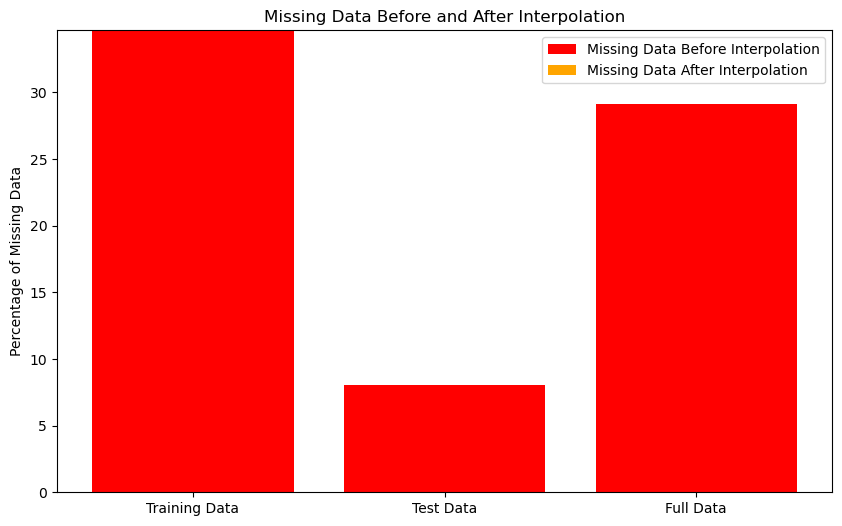

In [12]:
# Plot the number of missing values before and after interpolation
fig, ax = plt.subplots(figsize=(10, 6))
x_labels = ['Training Data', 'Test Data', 'Full Data']

# Count missing values before interpolation
missing_before = [
    train_data.isna().any(axis=1).sum(),
    test_data.isna().any(axis=1).sum(),
    full_data.isna().any(axis=1).sum()
]

# Count missing values after interpolation
missing_after = [
    train_data_interpolated.isna().any(axis=1).sum(),
    test_data_interpolated.isna().any(axis=1).sum(),
    full_data_interpolated.isna().any(axis=1).sum()
]

# Calculate percentages
total_rows = [len(train_data), len(test_data), len(full_data)]
percent_missing_before = [missing / total * 100 for missing, total in zip(missing_before, total_rows)]
percent_missing_after = [missing / total * 100 for missing, total in zip(missing_after, total_rows)]

# Plot the bar chart
ax.bar(x_labels, percent_missing_before, label='Missing Data Before Interpolation', color='red')
ax.bar(x_labels, percent_missing_after, bottom=percent_missing_before, label='Missing Data After Interpolation', color='orange')

# Add labels and legend
ax.set_ylabel('Percentage of Missing Data')
ax.set_title('Missing Data Before and After Interpolation')
ax.legend()

# Display the plot
plt.show()


In [23]:
### This results in division by zero. Delete if the next iteration works for us.

# # Define a function to calculate recovery
# def calculate_recovery(c, f, t):
#     recovery = (c * (f - t)) / (f * (c - t)) * 100
#     return recovery

# # Calculate the recovery for the train_data
# train_data['calculated_recovery'] = train_data.apply(lambda row: calculate_recovery(row['rougher.output.concentrate_au'], row['rougher.input.feed_au'], row['rougher.output.tail_au']), axis=1)

# # Calculate the mean absolute error (MAE) between the calculated recovery and the given recovery values
# mae = (abs(train_data['calculated_recovery'] - train_data['rougher.output.recovery'])).mean()
# print("Mean Absolute Error (MAE) between calculated recovery and given recovery values in train_data:", mae)


In [14]:
import numpy as np

# Define a function to calculate recovery
def calculate_recovery(c, f, t):
    epsilon = 1e-15  # Small constant to avoid division by zero
    recovery = (c * (f - t)) / ((f * (c - t)) + epsilon) * 100
    return recovery

# Calculate the recovery for the train_data
train_data['calculated_recovery'] = train_data.apply(lambda row: calculate_recovery(row['rougher.output.concentrate_au'], row['rougher.input.feed_au'], row['rougher.output.tail_au']), axis=1)

# Remove any potential NaN values after calculation
train_data = train_data.dropna(subset=['calculated_recovery', 'rougher.output.recovery'])

# Calculate the mean absolute error (MAE) between the calculated recovery and the given recovery values
mae = (abs(train_data['calculated_recovery'] - train_data['rougher.output.recovery'])).mean()
print("Mean Absolute Error (MAE) between calculated recovery and given recovery values in train_data:", mae)


Mean Absolute Error (MAE) between calculated recovery and given recovery values in train_data: 1.249626068534694e-14


In [15]:
# Calculate recovery for the rougher.output.recovery feature and find the MAE


## 1.3. Analyze features not available in the test set

In [16]:
# Identify and discuss the parameters not available in the test set


## 1.4. Perform data preprocessing

In [17]:
# Preprocess the data

# Analyze the Data <a name="analyze-the-data"></a>
## 2.1. Concentrations of metals at different purification stages

In [18]:
# Analyze the concentrations of metals (Au, Ag, Pb) at different purification stages

## 2.2. Compare feed particle size distributions

In [19]:
# Compare the feed particle size distributions in the training and test sets

2.3. Analyze total concentrations and eliminate anomalies

In [20]:
# Analyze total concentrations at different stages and eliminate anomalies if needed

# Build the Model <a name="build-the-model"></a>
## 3.1. Write a function to calculate the final sMAPE value

In [21]:
# Define a function to calculate the sMAPE and final sMAPE

## 3.2. Train different models and evaluate using cross-validation

In [22]:
# Train different models, evaluate them using cross-validation, and test the best model on the test sample

# Conclusion <a name="conclusion"></a>
## Summarize the project findings and results

## Project evaluation
Here’s what the reviewers will look at when reviewing your project: <br>
* Have you prepared and analyzed the data properly?
* What models have you developed?
* How did you check the model‘s quality?
* Have you followed all the steps of the instructions?
* Did you keep to the project structure and explain the steps performed?
* What are your findings?
* Have you kept the code neat and avoided code duplication?